# Александр Чернышёв

**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

In [2]:
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        self.X = X.astype(float)
        self.y = y.astype(int)
        self.y_dist = (self.X ** 2).sum(axis=1)
    
    def predict(self, X):
        X = X.astype(float)
        
        x_dist = (X ** 2).sum(axis=1)
        xy_dist = X.dot(self.X.T)
        dist = - 2 * xy_dist + self.y_dist + x_dist.reshape(-1, 1)
        dist = np.sqrt(dist)
        
        prediction = self.y[np.argsort(dist)[:, :self.n_neighbors]]
        return stats.mode(prediction, axis=1)[0].reshape(-1)
    
    def predict_proba(self, X):
        X = X.astype(float)
        
        x_dist = (X ** 2).sum(axis=1)
        xy_dist = X.dot(self.X.T)
        dist = - 2 * xy_dist + self.y_dist + x_dist.reshape(-1, 1)
        dist = np.sqrt(dist)
        
        prediction = self.y[np.argsort(dist)[:, :self.n_neighbors]]
        probability = np.zeros((X.shape[0], np.unique(self.y).shape[0]))
        for i in xrange(prediction.shape[1]):
            probability[np.arange(X.shape[0]).reshape(-1, 1), prediction[:, i].reshape(-1, 1)] += 1
        return probability / self.n_neighbors
    
    def score(self, X, y):
        return super(MyKNeighborsClassifier, self).score(X.astype(float), y.astype(int))

**IRIS**

Нужно написать код, который работает не медленне реализации из sklearn'а

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.55 ms, sys: 573 µs, total: 2.12 ms
Wall time: 1.66 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 97 µs, sys: 35 µs, total: 132 µs
Wall time: 107 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 1.41 ms, sys: 462 µs, total: 1.87 ms
Wall time: 1.52 ms


array([2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 143 ms, sys: 8.03 ms, total: 151 ms
Wall time: 149 ms


array([2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.43 ms, sys: 951 µs, total: 2.38 ms
Wall time: 1.65 ms


array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 664 µs, sys: 309 µs, total: 973 µs
Wall time: 655 µs


array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Max score 0.977777777778 with [1, 3, 4, 5, 9] nearest neighbors


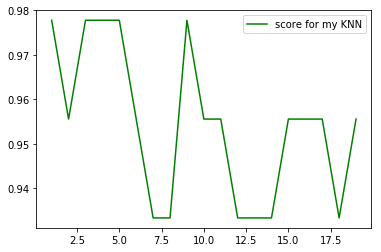

In [14]:
# Задание 3
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=1828)

neighbors = range(1, 20)
score = []
for k in neighbors:
    knn = MyKNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))

max_score = max(score)
print 'Max score {} with {} nearest neighbors'.format(max_score, [k + 1 for k, sc in enumerate(score) if sc == max_score])
    
plt.plot(neighbors, score, color='green', label='score for my KNN')
plt.legend()

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 30.5 s, sys: 497 ms, total: 31 s
Wall time: 31.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 379 ms, sys: 470 ms, total: 849 ms
Wall time: 1.35 s


In [20]:
%time clf.predict(X_test)

CPU times: user 9min 56s, sys: 7.46 s, total: 10min 4s
Wall time: 11min 8s


array([ 9.,  9.,  6., ...,  8.,  9.,  7.])

In [21]:
%time my_clf.predict(X_test)

CPU times: user 1min 26s, sys: 57.3 s, total: 2min 23s
Wall time: 3min 55s


array([9, 9, 6, ..., 8, 9, 7])

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 10min 2s, sys: 7.84 s, total: 10min 10s
Wall time: 11min 17s


array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 23s, sys: 56.4 s, total: 2min 19s
Wall time: 3min 48s


array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [24]:
clf.score(X_test, y_test)

0.96942857142857142

In [25]:
my_clf.score(X_test, y_test)

0.96942857142857142

Задание 5

In [26]:
# seaborn — библиотека для визуализации данных, основана на matplotlib
# matplotlib — библиотека для рисования 2D графиков
# train_test_split — разбивает данные на две части: тренировочную и тестовую
# Pipeline (from sklearn.pipeline import Pipeline) — для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) — стандартизует данные, обнуляя среднее и масштабирует до единичной дисперсии
# ClassifierMixin — миксин для всех классификаторов в sklearn
# NeighborsBase — базовый класс для оценок ближайших соседей
# KNeighborsMixin — миксин для поиска к-соседей
# SupervisedIntegerMixin — миксин для обучениея с использованием X в качестве данных обучения и y в качестве целевых значений